In [37]:

#mathmatical modules =====================================
import numpy as np
import math
#==========================================================
#scikit-learning modules ==================================
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt,image
#==========================================================
#scikit-image =============================================
import skimage.io as io
import skimage as sk
from skimage.exposure import histogram
from skimage.color import rgb2gray,rgb2hsv,label2rgb
from skimage.util import random_noise
from skimage.feature import canny,peak_local_max
from skimage.measure import label
from skimage.filters import gaussian,thresholding,threshold_otsu
import skimage.restoration as resto
from skimage import img_as_float,img_as_ubyte
import skimage.segmentation as seg
from skimage.filters.rank import entropy
from skimage.morphology import disk
#==========================================================
#scipy lib for transformative operations ==================
from scipy.signal import convolve2d
from scipy import fftpack,ndimage
#==========================================================
#Comprehensive Image libraries ============================
import cv2 
import cvlib as cv
#==========================================================
#quality assessment modules ===============================
import imquality.brisque as brisque
#==========================================================
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances


In [ ]:

def get_quality(img):
    return brisque.score(img)
def scale_scapec_sift(image: str):
    image = rgb2gray(io.imread(image))
    size = image.shape
    k = math.sqrt(2)
    space = np.zeros((5,))
    iterations = int(np.floor(math.log2(np.max(size))))
    scales = []
    img = image
    for iteration in range(iterations):
        temp_size = img.shape
        if temp_size[0]//2 > 0 and temp_size[1]//2 > 0:
            scales.append(img)
            img = cv2.resize(img,(temp_size[0]//2,temp_size[1]//2))

    for i in range(len(scales)):
        original = scales[i]
        scales[i] = []
        for j in range(5):
            scales[i].append(gaussian(original,k**j))
    for i in range(len(scales)):
        for j in range(5):
            io.imshow(scales[i][j])
    return scales

In [ ]:
def DoG(scales):
    differences = np.zeros([len(scales),len(scales[0])])
    for i in range(len(scales)):
        for j in range(1,len(scales[i])-1):
            differences[i][j] = np.subtract(scales[i][j-1],scales[i][j+1])
    return differences

In [6]:
img = cv2.imread("knife.jpg")
gray = cv2.cvtColor(img,code=cv2.COLOR_BGR2GRAY)
def panopatic_segmentation(img: np.ndarray,clusters: int):
    # pyramid = np.ndarray([cv2.resize(img,size = (img.shape[0]//(scaling_factor**i),img.shape[1]//(scaling_factor**i))) for i in range(1,np.max(img.shape)%scaling_factor)])
    newimg = np.copy(img)
    X = newimg.reshape(-1, 3) 
    model = KMeans(n_clusters=clusters,n_init=10)
    model.fit(X)
    segmented_img = model.cluster_centers_[model.labels_]
    segmented_img = segmented_img.reshape(newimg.shape)
    return segmented_img,model.cluster_centers_
def find_boundries_n_centers(img: np.ndarray):
    _, thresh = cv2.threshold(img,np.mean(img),255,cv2.THRESH_BINARY_INV)
    cnts, hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    cnt = sorted(cnts, key=cv2.contourArea)
    return cnt

TypeError: unhashable type: 'numpy.ndarray'

: 

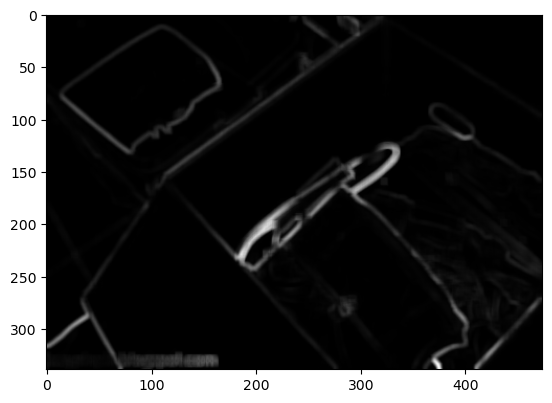

In [12]:
img = io.imread("OIP.jpg",as_gray=True)
k = 7 #texel size
img_mean = ndimage.uniform_filter(img,(k,k))
img_sqr_mean = ndimage.uniform_filter(img**2,(k,k))
img_var = img_sqr_mean - img_mean**2
plt.imshow(img_var,cmap="gray")

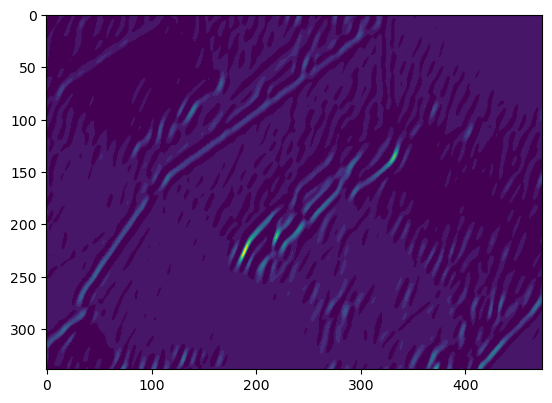

In [15]:
ksize = 45
theta= np.pi/8
kernel = cv2.getGaborKernel((ksize,ksize), 5.0, theta, 10.0, 0.9, 0, ktype= cv2.CV_32F)
filtered_image = cv2.filter2D(img,cv2.CV_8UC3,kernel)
plt.imshow(filtered_image)


d:\conda\Lib\site-packages\IPython\core\interactiveshell.py:3526: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


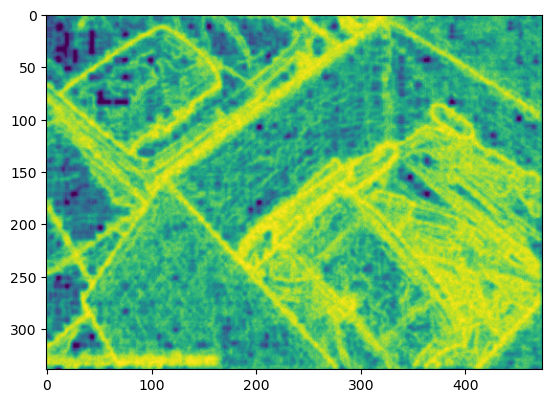

In [17]:
entropy_img = entropy(img,disk(3))
plt.imshow(entropy_img)

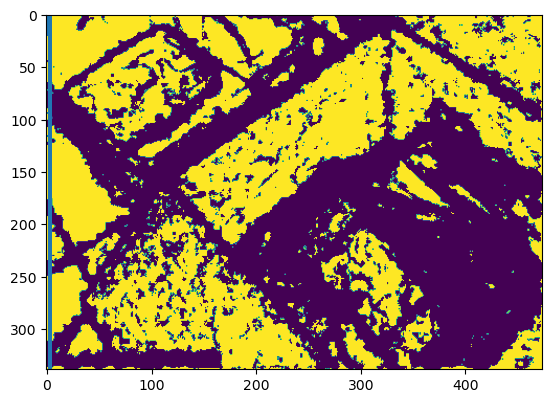

In [18]:
plt.hist(entropy_img.flat,bins=100,range=(0,5))
thresh = threshold_otsu(entropy_img)
binary = entropy_img <= thresh
plt.imshow(binary)

In [46]:

def object_extraction(name: str, img_history: list):
    img = rgb2gray(io.imread(name))
    # img = cv2.resize(img,dsize =(640,640))
    # gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    edges = canny(img,sigma = 1)
    dt = ndimage.distance_transform_edt(~edges)
    lmax = peak_local_max(dt,min_distance=5)
    markers = label(lmax)
    labels = seg.watershed(-dt,markers)
    io.imshow(seg.mark_boundaries(img,labels))
    # image_objects = []
    # edges = canny(gray,sigma=1)
    # conts,_ = cv2.findContours(edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)  
    # for cont in conts:
    #     rect = cv2.minAreaRect(cont)
    #     box = cv2.boxPoints(rect)
    #     box = np.intp(box)
    #     img = cv2.drawContours(img,[box],0,(0,255,0),3)
    # cv2.imshow("conts", img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

object_extraction("knife.jpg",None)    

ValueError: operands could not be broadcast together with shapes (2152,2) (1280,960) 